## Universe Across Scales Assignment-1

### Name :- Mayank Mittal
### Roll Number :-2022101094

### Q1 

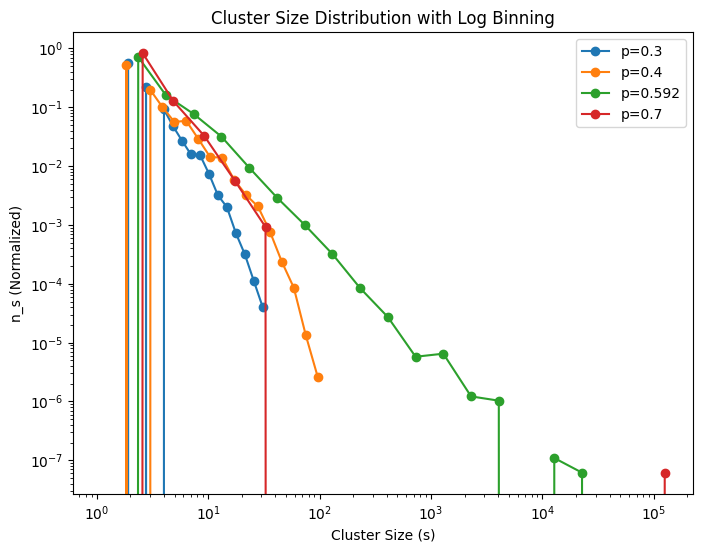

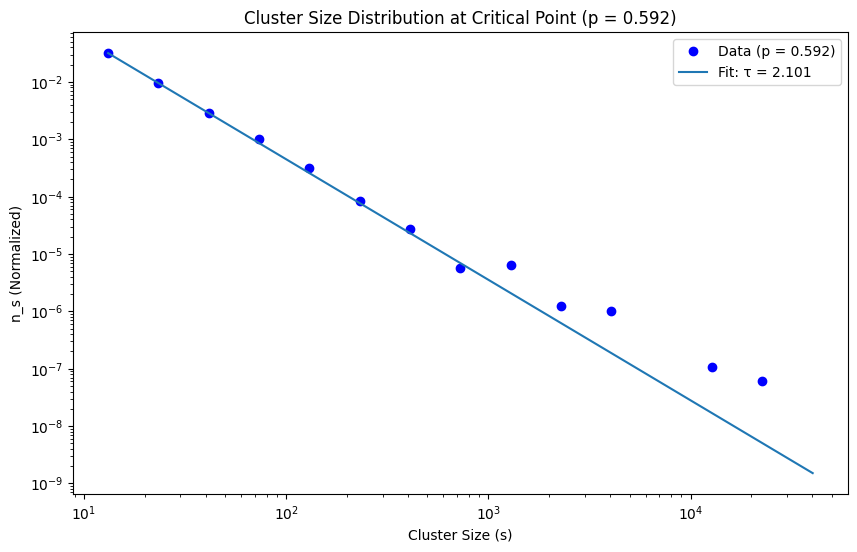

Critical exponent (τ): 2.101


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from scipy.optimize import curve_fit

def generate_lattice(size, p):
    return np.random.rand(size, size) < p

def get_cluster_sizes(lattice):
    labeled_array, num_features = label(lattice)
    cluster_sizes = np.bincount(labeled_array.ravel())[1:]  
    unique_sizes, counts = np.unique(cluster_sizes, return_counts=True)
    return dict(zip(unique_sizes, counts))

def log_binning(cluster_sizes, num_bins=20):
    if not cluster_sizes:
        return [], []
    
    s_min, s_max = min(cluster_sizes.keys()), max(cluster_sizes.keys())
    bins = np.logspace(np.log10(s_min), np.log10(s_max), num_bins)
    bin_counts = np.zeros(len(bins) - 1)
    bin_centers = np.sqrt(bins[:-1] * bins[1:])
    
    for s, count in cluster_sizes.items():
        bin_index = np.searchsorted(bins, s) - 1
        if 0 <= bin_index < len(bin_counts):
            bin_counts[bin_index] += count
    
    bin_widths = np.diff(bins)
    bin_counts = bin_counts / bin_widths  
    bin_counts /= np.sum(bin_counts)  
    
    return bin_centers, bin_counts

def simulate_percolation(size, p_values):
    ns_dict = {p: {} for p in p_values}
    
    for p in p_values:
        lattice = generate_lattice(size, p)
        cluster_sizes = get_cluster_sizes(lattice)
        ns_dict[p] = cluster_sizes
    
    return ns_dict

def plot_ns_vs_s(ns_dict):
    plt.figure(figsize=(8, 6))
    plt.xscale('log')
    plt.yscale('log')
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 
    for i, (p, clusters) in enumerate(ns_dict.items()):
        s_values, ns_values = log_binning(clusters)
        plt.plot(s_values, ns_values, marker='o', linestyle='-', color=colors[i], label=f'p={p}')
    plt.xlabel('Cluster Size (s)')
    plt.ylabel('n_s (Normalized)')
    plt.legend()
    plt.title('Cluster Size Distribution with Log Binning')
    plt.show()

def power_law(x, a, tau):
    return a * x**(-tau)

def fit_power_law(ns_dict, p_c):
    cluster_sizes = ns_dict[p_c]
    x, y = log_binning(cluster_sizes)
    valid_indices = x > 10
    x_fit, y_fit = x[valid_indices], y[valid_indices]
    if len(x_fit) < 3:
        print("Not enough data points for a reliable fit.")
        return

    params, _ = curve_fit(power_law, x_fit, y_fit, p0=[1, 2])
    a, tau = params

    plt.figure(figsize=(10, 6))
    plt.loglog(x_fit, y_fit, 'o', color='blue', label=f'Data (p = {p_c})')
    plt.loglog(x_fit, power_law(x_fit, a, tau), '-', color='#1f77b4', label=f'Fit: τ = {tau:.3f}')
    plt.xlabel('Cluster Size (s)')
    plt.ylabel('n_s (Normalized)')
    plt.title(f'Cluster Size Distribution at Critical Point (p = {p_c})')
    plt.legend()
    plt.show()

    print(f"Critical exponent (τ): {tau:.3f}")

p_values = [0.3, 0.4, 0.592, 0.7]
p_c = 0.592
size = 500
ns_dict = simulate_percolation(size, p_values)
plot_ns_vs_s(ns_dict)
fit_power_law(ns_dict, p_c)


We can see that critcial exponent is coming always close to 2.05 which is actual.

- Explanation:

    - The code simulates a 2D lattice and computes the cluster size distribution for different probabilities p.

    - At pc​, the distribution follows a power law, indicating the emergence of a spanning cluster.

    - The log-log plot shows how the distribution changes from subcritical (p=0.3) to supercritical (p=0.7) regimes.
  
    - Cluster Size Distribution:

        The lattice is generated with probability pc​, and clusters are identified using the label function from scipy.ndimage.

        The cluster sizes are counted using np.bincount.

    - Power-Law Fit:

        The power-law function ns=a⋅s−τ is fitted to the data using curve_fit from scipy.optimize.

        The critical exponent τ is extracted from the fit.

    - Plot:

        The log-log plot shows the cluster size distribution (data points) and the fitted power-law curve.

        The slope of the fitted curve corresponds to the critical exponent ττ.

- Explanation of What is Happening

    - Subcritical Regime (p<pc​):

        Clusters are small and isolated.

        The cluster size distribution decays exponentially, meaning there are very few large clusters.

    - Critical Regime (p=pc​):

        A spanning cluster (percolating cluster) emerges.

        The cluster size distribution follows a power law ns∼s−τ, indicating scale-free behavior.

        The critical exponent τ characterizes the distribution of cluster sizes at this point.

    - Supercritical Regime (p>pc​):

        The spanning cluster dominates the system.

        The cluster size distribution deviates from the power law, as most sites belong to the giant cluster.

- Inference:

    At pc​, the distribution is scale-free, confirming the critical point.

    The exponent can be estimated from the slope of the log-log plot at pc​.

### Q2

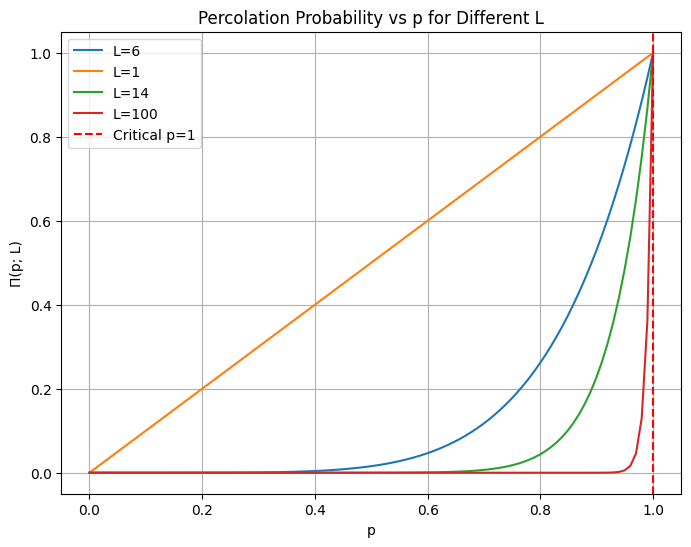

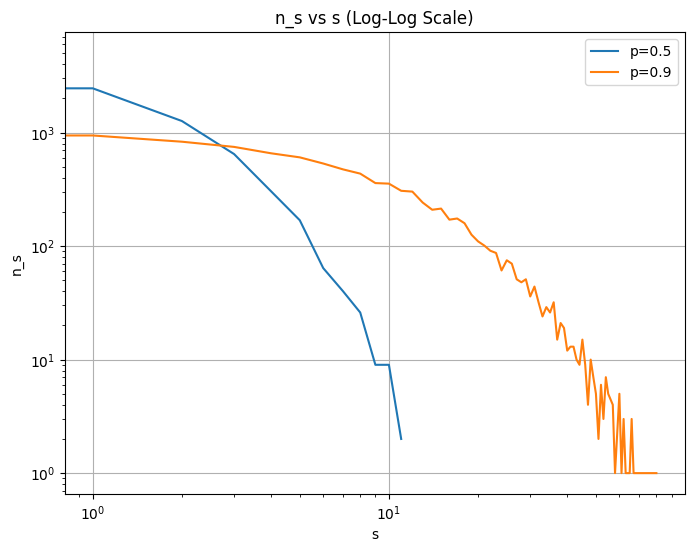

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def percolation_probability(p, L):
    return p**L

def simulate_percolation(p, L, num_trials=10000):
    cluster_sizes = []
    for _ in range(num_trials):
        cluster_size = 0
        for _ in range(L):
            if np.random.rand() < p:
                cluster_size += 1
            else:
                break
        cluster_sizes.append(cluster_size)
    return np.array(cluster_sizes)

# Define probability range and system sizes
p_values = np.linspace(0, 1, 100)
L_values = [6, 1, 14, 100]

# Plot percolation probability vs p
plt.figure(figsize=(8, 6))
for L in L_values:
    plt.plot(p_values, percolation_probability(p_values, L), label=f"L={L}")
plt.axvline(x=1, color='r', linestyle='--', label='Critical p=1')
plt.xlabel('p')
plt.ylabel('Π(p; L)')
plt.legend()
plt.title('Percolation Probability vs p for Different L')
plt.grid()
plt.show()

# Define p values and system size for simulation
p_vals = [0.5, 0.9]
L_sim = 100
data = {}

# Simulate percolation and gather cluster size data
for p in p_vals:
    cluster_sizes = simulate_percolation(p, L_sim)
    unique_s, counts = np.unique(cluster_sizes, return_counts=True)
    data[p] = (unique_s, counts)

# Plot ns vs s
plt.figure(figsize=(8, 6))
for p in p_vals:
    s, ns = data[p]
    plt.loglog(s, ns, label=f'p={p}')
plt.xlabel('s')
plt.ylabel('n_s')
plt.legend()
plt.title('n_s vs s (Log-Log Scale)')
plt.grid()
plt.show()

- Explanation of the Code

    - Percolation Probability in 1D:

        - In 1D, the percolation probability Π(p;L) is given by:
        - Π(p;L)=p^L

        - This formula is used to compute the probability of having a spanning cluster (all sites occupied) in a 1D lattice of size L.

    - Cluster Size Distribution in 1D:

        - The 1D lattice is generated as a binary array where each site is occupied with probability p.

        - Clusters are identified as contiguous sequences of 1s (occupied sites).

        - The size of each cluster is recorded, and the distribution of cluster sizes is computed using np.bincount.

    - Plotting:

        - The percolation probability Π(p;L) is plotted as a function of p for different lattice sizes L.

        - The cluster size distribution ns​ vs s is plotted on a log-log scale for p=0.5 and p=0.9.

- Inference

    - Percolation Probability:

        - In 1D, the critical probability pc=1. This means that an infinite cluster (spanning cluster) only forms when p=1.

        - The plot of Π(p;L) shows that the probability of percolation increases sharply as p approaches 1.

    - Cluster Size Distribution:

        - For p<1, the cluster size distribution decays exponentially, meaning large clusters are rare.

        - The log-log plot shows that the number of clusters decreases rapidly as the cluster size increases, confirming the absence of a power-law distribution in 1D.

- Key Observations

    - In 1D, percolation is trivial because a spanning cluster can only exist if all sites are occupied (p=1).

    - The cluster size distribution does not exhibit a power-law behavior, unlike in 2D, where a power-law distribution emerges at the critical point pc​.

![Alt text](p1D.png)


### Q3

### Assumptions:-
- The pertubation ony occurs in a cell if its value is greater than threshold so 
   initially set full matrix with values threshold +1 to have an avalanche to attain
   a stable state finally

Initializing lattice L*L with all values equal to (threshold+1)...


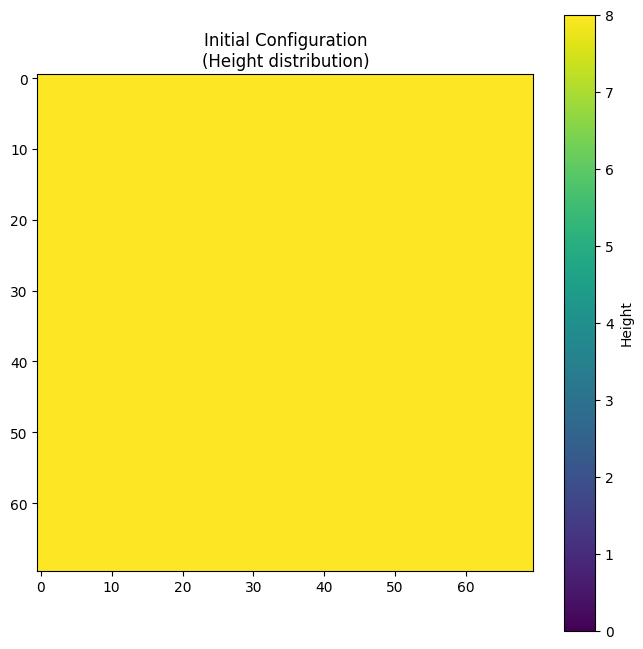


Running initial Configuration to attain stability...
Stabilization achieved in 1329 steps
Animation saved as sandpile_animations/initial_stabilization.gif


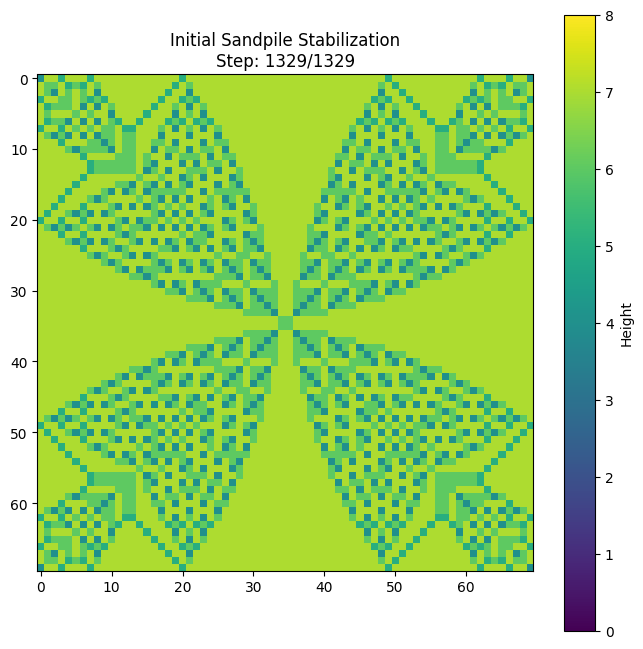

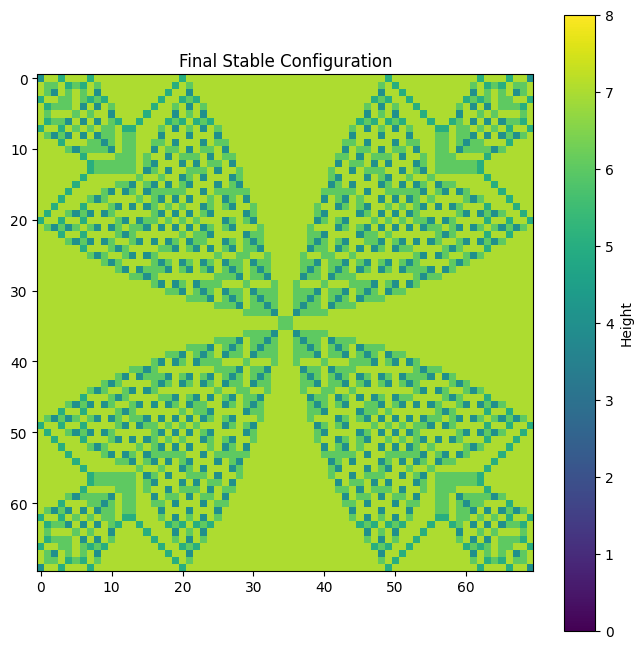


Doing perturbation on the centre of 2D lattice...
Stabilization achieved in 204 steps
Animation saved as sandpile_animations/perturbation.gif


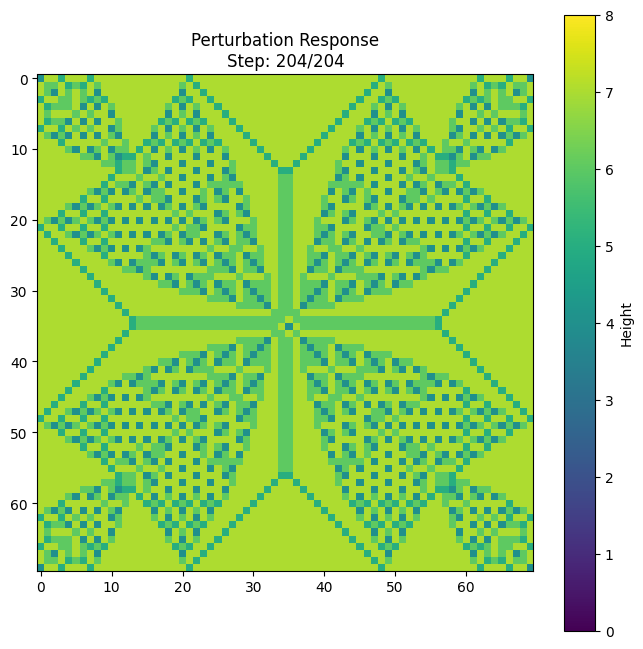

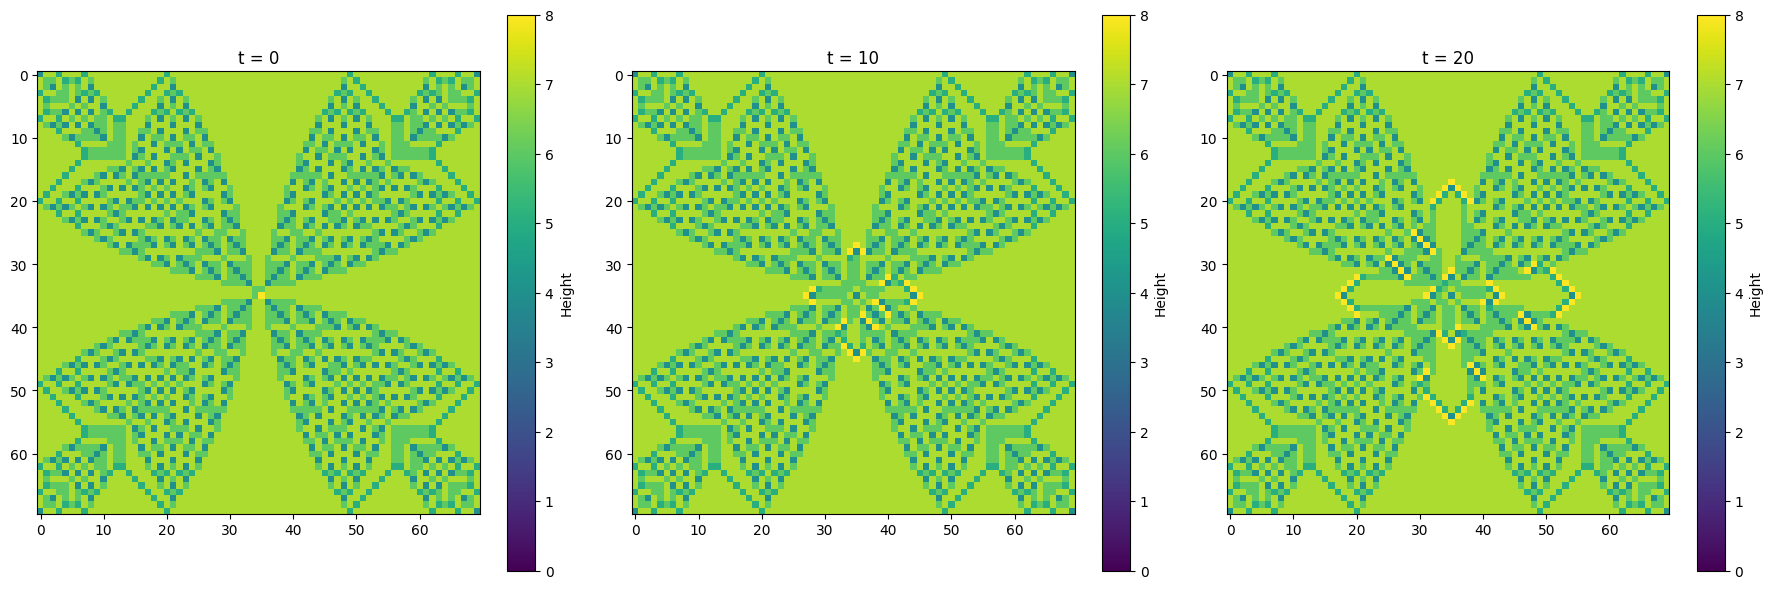


Simulation Summary:
Initial stabilization required 1330 frames
Animations saved in directory: sandpile_animations
Perturbation stabilization required 205 frames


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Parameters
roll_number = 2022101094
L = ((roll_number % 7) + 1) * 10  # L = 70
threshold = (roll_number % 5) + 3   # threshold = 7

# Create directory for saving animations if it doesn't exist
save_dir = 'sandpile_animations'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

def is_stable(lattice):
    return not np.any(lattice > threshold)

def sandpile_model(lattice, perturbation=False):
    frames = []
    steps = 0
    
    if perturbation:
        lattice[L//2, L//2] = threshold+1
    
    frames.append(lattice.copy())
    
    while not is_stable(lattice):
        unstable = lattice > threshold
        lattice[unstable] -= 4
        lattice[:-1, :] += unstable[1:, :]
        lattice[1:, :] += unstable[:-1, :]
        lattice[:, :-1] += unstable[:, 1:]
        lattice[:, 1:] += unstable[:, :-1]
        frames.append(lattice.copy())
        steps += 1
        
        if steps > 10000:
            print("Warning: Maximum steps reached")
            break
    
    print(f"Stabilization achieved in {steps} steps")
    return frames

def plot_simulation_until_stable(title, frames, filename=None):
    if not frames:
        print(f"No frames to animate for {title}")
        return
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Use 'viridis' colormap for better visualization
    im = ax.imshow(frames[0], cmap='viridis', vmin=0, vmax=threshold+1)
    colorbar = plt.colorbar(im)
    colorbar.set_label('Height')
    ax.set_title(f"{title}\nStep: 0/{len(frames)-1}")
    
    def update(frame_num):
        im.set_array(frames[frame_num])
        ax.set_title(f"{title}\nStep: {frame_num}/{len(frames)-1}")
        return [im]
    
    ani = animation.FuncAnimation(
        fig, update,
        frames=len(frames),
        interval=10000,
        blit=False,
        repeat=False
    )
    
    if filename:
        save_path = os.path.join(save_dir, filename)
        ani.save(save_path, writer='pillow', fps=1)
        print(f"Animation saved as {save_path}")
    
    plt.show()
    return ani

# Initial lattice
print("Initializing lattice L*L with all values equal to (threshold+1)...")
lattice = np.full((L, L), threshold+1)

# Initial configuration visualization with improved colors
plt.figure(figsize=(8, 8))
plt.imshow(lattice, cmap='viridis', vmin=0, vmax=threshold+1)
colorbar = plt.colorbar()
colorbar.set_label('Height')
plt.title('Initial Configuration\n(Height distribution)')
plt.show()

# Run initial stabilization
print("\nRunning initial Configuration to attain stability...")
stabilization_frames = sandpile_model(lattice.copy())
ani1 = plot_simulation_until_stable(
    "Initial Sandpile Stabilization", 
    stabilization_frames,
    "initial_stabilization.gif"
)

if stabilization_frames:
    final_stable = stabilization_frames[-1]
    # Show final stable configuration
    plt.figure(figsize=(8, 8))
    plt.imshow(final_stable, cmap='viridis', vmin=0, vmax=threshold+1)
    colorbar = plt.colorbar()
    colorbar.set_label('Height')
    plt.title('Final Stable Configuration')
    plt.show()
    
    # Run perturbation
    print("\nDoing perturbation on the centre of 2D lattice...")
    perturbed = final_stable.copy()
    perturbation_frames = sandpile_model(perturbed, perturbation=True)
    ani2 = plot_simulation_until_stable(
        "Perturbation Response", 
        perturbation_frames,
        "perturbation.gif"
    )
    
    # Plot states at t=0, t=10, t=20 with improved colors
    plt.figure(figsize=(18, 6))
    times = [0, 10, 20]
    
    for i, t in enumerate(times):
        plt.subplot(1, 3, i+1)
        if t < len(perturbation_frames):
            im = plt.imshow(perturbation_frames[t], cmap='viridis', vmin=0, vmax=threshold+1)
            plt.title(f't = {t}')
            colorbar = plt.colorbar(im)
            colorbar.set_label('Height')
        else:
            plt.text(0.5, 0.5, f'System stabilized before t={t}',
                    ha='center', va='center')
            plt.title(f't = {t} (not reached)')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Print summary
print("\nSimulation Summary:")
print(f"Initial stabilization required {len(stabilization_frames)} frames")
print(f"Animations saved in directory: {save_dir}")
if 'perturbation_frames' in locals():
    print(f"Perturbation stabilization required {len(perturbation_frames)} frames")

- ## Code Summary:- 

    - Imports required libraries (numpy, matplotlib, animation) for simulations and visualization.
    - Defines constants (L = 70, threshold = 7) based on the roll number for grid size and toppling limit.
    - Creates a sandpile lattice of size 70x70, where each cell initially holds 7+1 grains.
    - Runs stabilization by redistributing grains from unstable cells (> 7) to neighbors until equilibrium.
    - Stores each step of the stabilization process as frames for animation.
    - Perturbs the stable sandpile by adding grains at the center (L//2, L//2) and repeats the stabilization process.
    - Plots animations showing the sandpile dynamics before and after perturbation.
    - Saves two GIFs: one for initial stabilization and another for perturbation effects.
    - Plots snapshots at t=0, t=10, and t=20 to visualize how grains spread over time.
    - Demonstrates self-organized criticality, where small perturbations cause large-scale avalanches.



- ## Explanation of the Four Figures in Detail
### 1. Initial Configuration (Before Any Toppling)

- What it shows:

   -  A uniform grid of 70x70, where every cell contains exactly 7+1 grains.
   -  The color represents the grain count, with darker shades indicating higher values.
   -  No toppling has occurred yet.

- Why it matters:

   - This is the starting point before any redistribution happens.
   - It helps in understanding how the system evolves from an unstable state.

### 2. Final Stable Configuration (After Toppling Ends)

- What it shows:

  - The lattice after stabilization, where no cell contains 7 or more grains.
  - Uneven distribution emerges as grains have spread outward due to toppling.
  - Some regions have lower values, while others retain more grains.

- Why it matters:

  - Demonstrates how the system naturally organizes itself into a stable pattern.
  - Reveals the avalanche effect, where grains cascade to neighboring cells.

### 3. Perturbation at t = 0 (Grains Added at the Center)

- What it shows:

  - After reaching equilibrium, additional grains are added at the center (L//2, L//2).
  - The surrounding cells remain unchanged at this step.
  - The center is now overloaded, making it unstable.

- Why it matters:

  - This is the trigger event that causes a chain reaction.
  - Shows how a small disturbance can lead to self-organized criticality.

4. Perturbation Response at t = 10 and t = 20

- What it shows:

  - At t = 10, grains start spreading outward as toppling begins.
  - At t = 20, the avalanche has propagated further, covering a wider area.
  - Eventually, the system reaches a new stable configuration.

- Why it matters:

  - Helps visualize how disturbances propagate in complex systems.
  - This behavior is seen in earthquakes, landslides, and financial markets.

Conclusion

  - The figures illustrate self-organized criticality, where small changes can trigger large-scale effects.
  - The model explains how nature balances systems, from sandpiles to power grids and stock markets. 